# Data retrieving

In [93]:
import pandas as pd

df = pd.read_csv('zomato_df_final_data.csv')

print(df.head())

df.dtypes

                                             address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmo

address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object

## Part A –Importing and Understanding Data

How many unique cuisines are served by Sydney restaurants?

Number of unique cuisines: 134


C:\Users\RandallZhao\AppData\Local\Temp\ipykernel_1995772\2824653174.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_count.index, y=cuisine_count.values, palette='viridis')


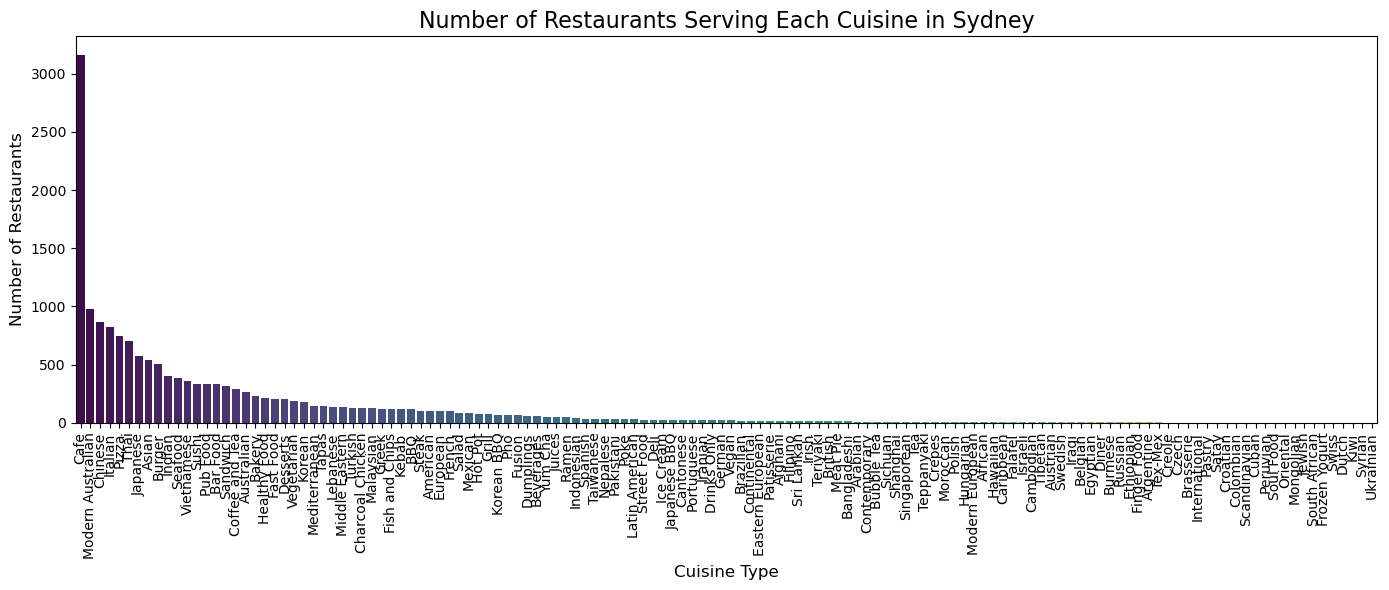

In [94]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the cuisine column from a string to a list using ast.literal_eval
df['cuisine'] = df['cuisine'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Sort the cuisine
df['sorted_cuisine'] = df['cuisine'].apply(lambda x: tuple(sorted(x)))

# Expand the list and count the frequencies
all_cuisines = []  
for cuisine_list in df['sorted_cuisine']:
    all_cuisines.extend(cuisine_list)

cuisine_df = pd.DataFrame(all_cuisines, columns=['Cuisine'])

unique_cuisines = cuisine_df['Cuisine'].unique()

print(f"Number of unique cuisines: {len(unique_cuisines)}")

cuisine_count = cuisine_df['Cuisine'].value_counts()

# Visualization
plt.figure(figsize=(14, 6))
sns.barplot(x=cuisine_count.index, y=cuisine_count.values, palette='viridis')
plt.title('Number of Restaurants Serving Each Cuisine in Sydney', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Which suburbs (top 3) have the highest number of restaurants?

C:\Users\RandallZhao\AppData\Local\Temp\ipykernel_1995772\2827465098.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette='viridis')


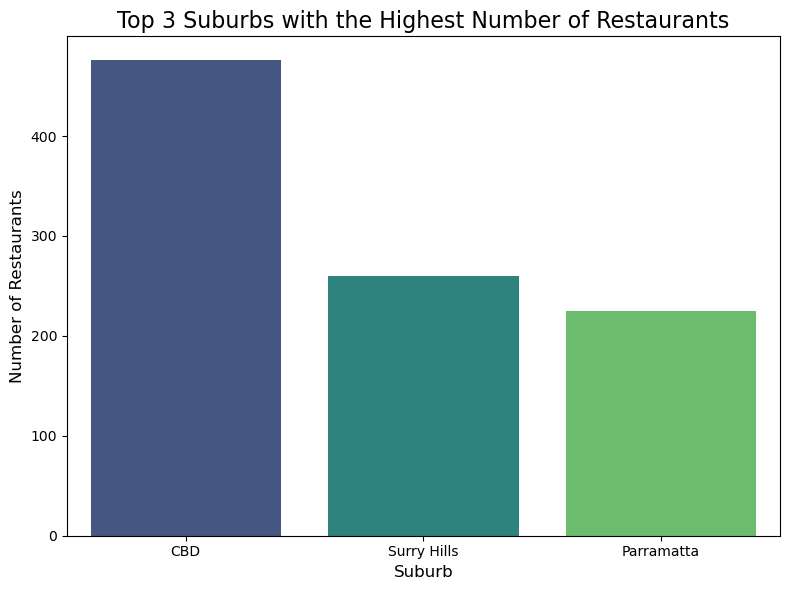

In [95]:
top_suburbs = df['subzone'].value_counts().head(3)

# Visiualize top 3 restrant
plt.figure(figsize=(8, 6))
sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette='viridis')
plt.title('Top 3 Suburbs with the Highest Number of Restaurants', fontsize=16)
plt.xlabel('Suburb', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.tight_layout()
plt.show()

“Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive”. Do you agree with this statement or not? Please support your answer with numbers and visuals. (hint: use stacked bar chart or histogram to relate ‘cost’ to 'rating_text')


C:\Users\RandallZhao\AppData\Local\Temp\ipykernel_1995772\713049067.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_text', y='cost', data=average_cost_per_rating, order=rating_order, palette='Set2')


Average cost of 'Excellent' rated restaurants: 101.66666666666667
Average cost of 'Poor' rated restaurants: 55.84577114427861


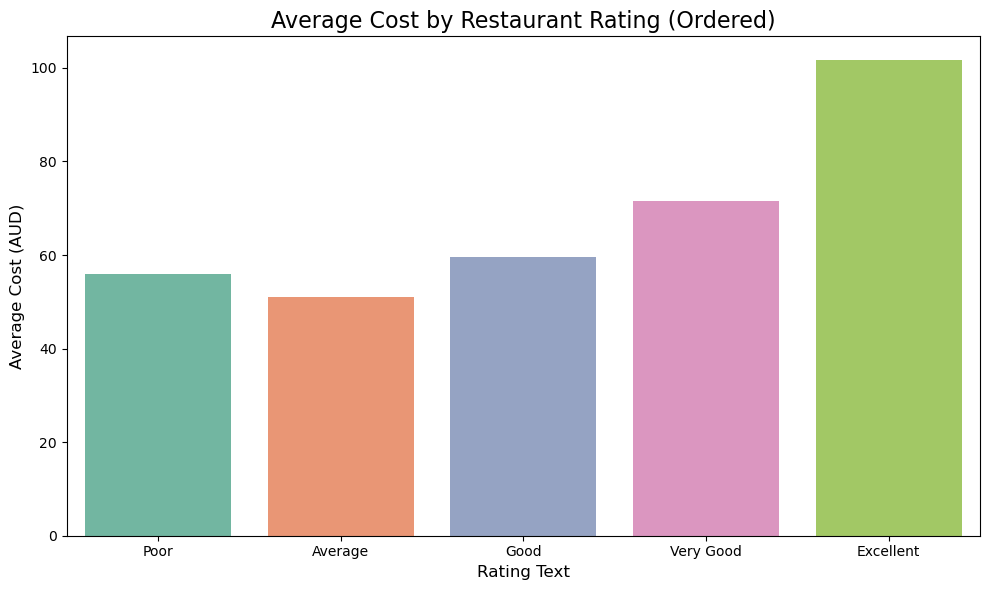

In [96]:
excellent_ratings = df[df['rating_text'] == 'Excellent']
poor_ratings = df[df['rating_text'] == 'Poor']

excellent_cost_avg = excellent_ratings['cost'].mean()
poor_cost_avg = poor_ratings['cost'].mean()

print(f"Average cost of 'Excellent' rated restaurants: {excellent_cost_avg}")
print(f"Average cost of 'Poor' rated restaurants: {poor_cost_avg}")

# calculate average cost
average_cost_per_rating = df.groupby('rating_text')['cost'].mean().reset_index()


rating_order = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent']


plt.figure(figsize=(10, 6))
sns.barplot(x='rating_text', y='cost', data=average_cost_per_rating, order=rating_order, palette='Set2')
plt.title('Average Cost by Restaurant Rating (Ordered)', fontsize=16)
plt.xlabel('Rating Text', fontsize=12)
plt.ylabel('Average Cost (AUD)', fontsize=12)
plt.tight_layout()
plt.show()

Based on the average cost in the figure, the more expensive restaurants are rated higher relative to the cheaper restaurants.

# Perform exploratory analysis.

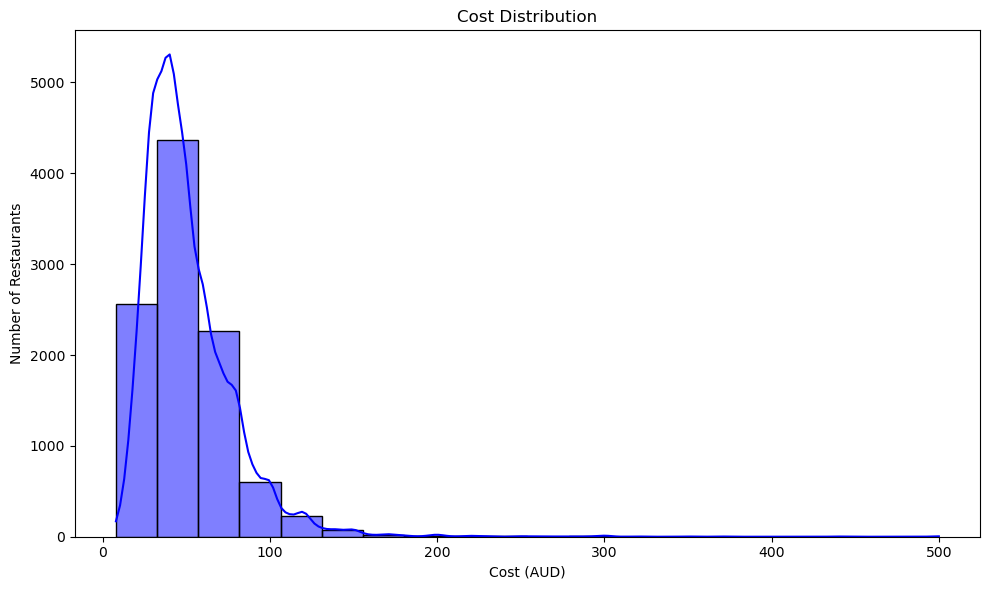

Cost Descriptive Statistics:
count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64


In [97]:
# histogram and descriptive statistics of Cost
plt.figure(figsize=(10, 6))
sns.histplot(df['cost'], bins=20, kde=True, color='blue')
plt.title('Cost Distribution')
plt.xlabel('Cost (AUD)')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

print("Cost Descriptive Statistics:")
print(df['cost'].describe())



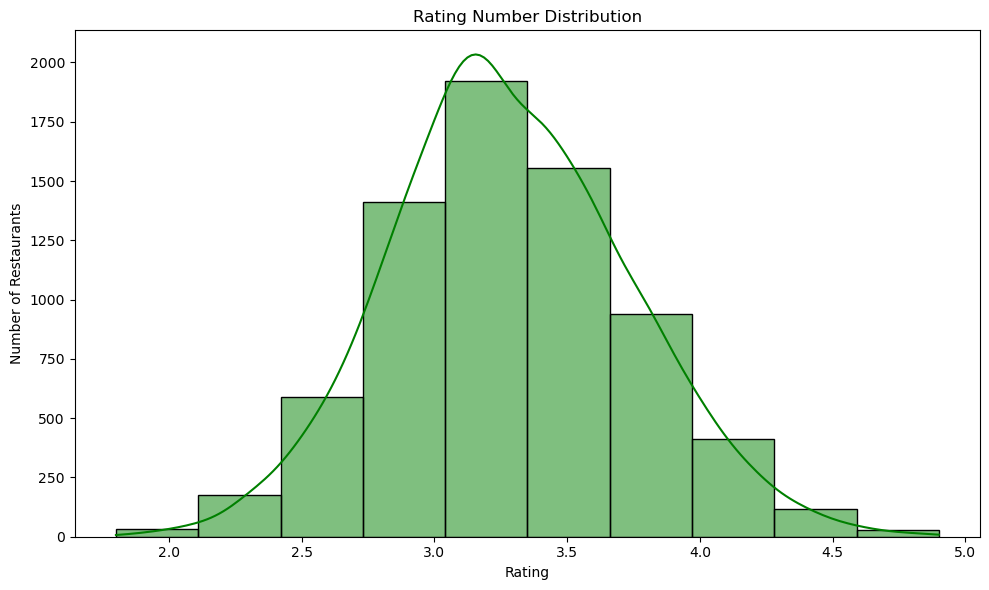

Rating Number Descriptive Statistics:
count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


In [98]:
# histogram and descriptive statistics of Rating_number
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_number'], bins=10, kde=True, color='green')
plt.title('Rating Number Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

print("Rating Number Descriptive Statistics:")
print(df['rating_number'].describe())

C:\Users\RandallZhao\AppData\Local\Temp\ipykernel_1995772\147407546.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_count.index, y=type_count.values, palette='Set2')


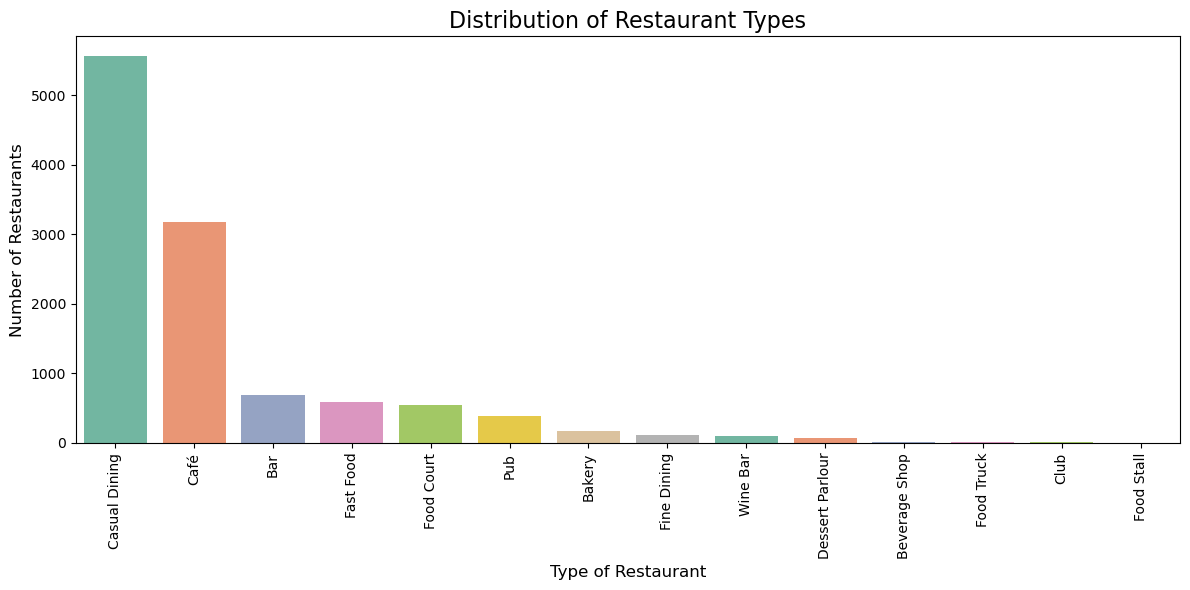

Restaurant Type Frequency Descriptive Statistics:
count      14.000000
mean      817.642857
std      1592.970211
min         2.000000
25%        29.500000
50%       143.500000
75%       576.750000
max      5566.000000
Name: count, dtype: float64


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the type column from a string to a list using ast.literal_eval
df['type'] = df['type'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# sort the type
df['sorted_type'] = df['type'].apply(lambda x: tuple(sorted(x)) if isinstance(x, list) else x)


all_types = []
for type_list in df['sorted_type']:
    if isinstance(type_list, (tuple, list)): 
        all_types.extend(type_list)


type_df = pd.DataFrame(all_types, columns=['Type'])

type_count = type_df['Type'].value_counts()

# Visiulization
plt.figure(figsize=(12, 6))
sns.barplot(x=type_count.index, y=type_count.values, palette='Set2')
plt.title('Distribution of Restaurant Types', fontsize=16)
plt.xlabel('Type of Restaurant', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print("Restaurant Type Frequency Descriptive Statistics:")
print(type_count.describe())


# 3- Produce Cuisine Density Map

C:\Users\RandallZhao\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


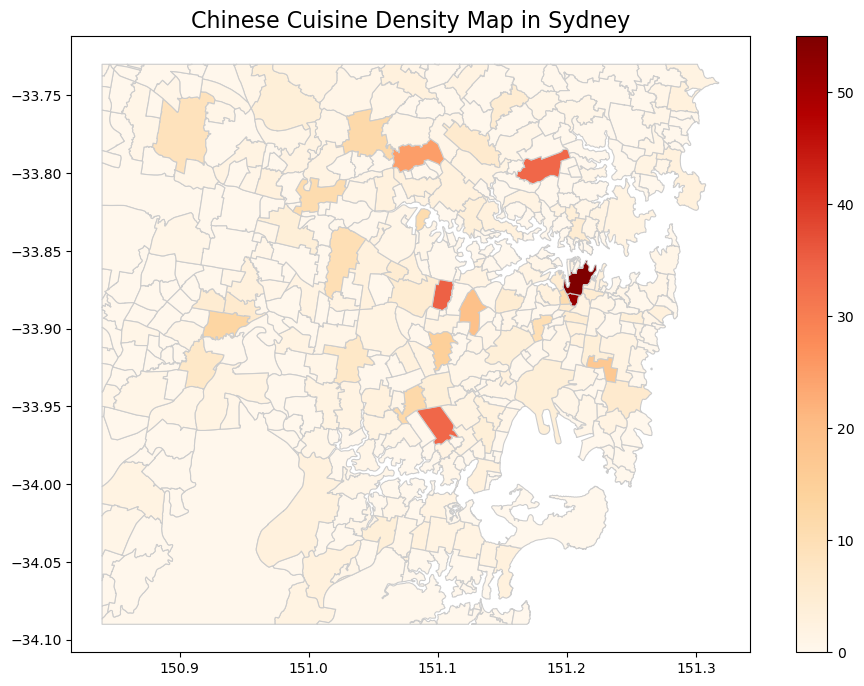

In [100]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def show_cuisine_densitymap(cuisine, restaurant_data_path, geojson_path):
    sydney_map = gpd.read_file(geojson_path)
    restaurant_data = pd.read_csv(restaurant_data_path)
    restaurant_data['cuisine'] = restaurant_data['cuisine'].apply(lambda x: x.strip('[]').replace("'", "").split(','))
    filtered_restaurants = restaurant_data[restaurant_data['cuisine'].apply(lambda x: cuisine in [c.strip() for c in x])]
    restaurant_gdf = gpd.GeoDataFrame(
        filtered_restaurants,
        geometry=gpd.points_from_xy(filtered_restaurants['lng'], filtered_restaurants['lat']),
        crs="EPSG:4326"
    )
    joined_gdf = gpd.sjoin(restaurant_gdf, sydney_map, how="inner", op="within")

    cuisine_density = joined_gdf.groupby('SSC_NAME').size().reset_index(name='restaurant_count')

    sydney_map = sydney_map.merge(cuisine_density, how="left", left_on="SSC_NAME", right_on="SSC_NAME")

    sydney_map['restaurant_count'] = sydney_map['restaurant_count'].fillna(0)

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    sydney_map.plot(column='restaurant_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    plt.title(f'{cuisine} Cuisine Density Map in Sydney', fontsize=16)

    plt.show()

# Sample
show_cuisine_densitymap('Chinese', 'zomato_df_final_data.csv', 'sydney.geojson')



# Ploty

Disadvantages of static graphs:
Zooming and panning are limited, and static graphs cannot easily handle real-time updates or dynamic data presentation.
Advantages of interactive graphing libraries:
Zooming and panning: Users can zoom in and out of the graph to focus on a specific area. There are hover tooltips. The database can be easily integrated into web applications, and supports real-time updating of graphs, which is suitable for processing scenarios such as time series and dynamic data. Users can filter and filter data in real time by clicking or selecting a specific data range.

# 5- Tableau

https://public.tableau.com/views/RuiZhao/Sheet1?:language=zh-CN&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# Part B – Predictive Modelling

## I. Feature Engineering

## 1.Data cleaning

In [101]:
# Remove columns that are not useful for prediction: 'address', 'link', 'title', 'lat', 'lng', 'phone'.
df_raw = pd.read_csv('zomato_df_final_data.csv')
df = df_raw.drop(columns=['address', 'link', 'title', 'lat', 'lng', 'phone','cost_2'])

In [102]:
# Check missing value
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
cost              346
cuisine             0
rating_number    3316
rating_text      3316
subzone             0
type               48
votes            3316
groupon             0
color               0
cuisine_color       0
dtype: int64


In [103]:
# Remove records containing missing values ​​in important columns
df = df.dropna(subset=['rating_number', 'rating_text','votes','cost','type'])

In [104]:
df = df.drop_duplicates()

print("Data after cleaning:")
print(df.info())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 7058 entries, 0 to 10212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cost           7058 non-null   float64
 1   cuisine        7058 non-null   object 
 2   rating_number  7058 non-null   float64
 3   rating_text    7058 non-null   object 
 4   subzone        7058 non-null   object 
 5   type           7058 non-null   object 
 6   votes          7058 non-null   float64
 7   groupon        7058 non-null   bool   
 8   color          7058 non-null   object 
 9   cuisine_color  7058 non-null   object 
dtypes: bool(1), float64(3), object(6)
memory usage: 558.3+ KB
None


# 2.Data preparation

Explore categorical variables

In [105]:
# types of variables
# categrical variables
categorical = [var for var in df.columns if df[var].dtype=='O' or df[var].dtype == 'bool']
print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are: ", categorical)

There are 7 categorical variables

The categorical variables are:  ['cuisine', 'rating_text', 'subzone', 'type', 'groupon', 'color', 'cuisine_color']


In [106]:
# Explore categorical variables
df[categorical].head()

,cuisine,rating_text,subzone,type,groupon,color,cuisine_color
0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",Very Good,CBD,['Casual Dining'],False,#e15307,#6f706b
1,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",Excellent,"The Grounds of Alexandria, Alexandria",['Café'],False,#9c3203,#6f706b
2,['Japanese'],Excellent,"The Star, Pyrmont",['Fine Dining'],False,#7f2704,#6f706b
3,['Modern Australian'],Excellent,Circular Quay,"['Fine Dining', 'Bar']",False,#7f2704,#4186f4
4,"['Thai', 'Salad']",Excellent,Chinatown,['Casual Dining'],False,#a83703,#6f706b


### Explore Numerical Variables

In [107]:
numericals = [var for var in df.columns if df[var].dtype != 'O' and df[var].dtype != 'bool']
print('There are {} numerical variables\n'.format(len(numericals)))
print('The numerical variables are :', numericals)
df[numericals].head()

There are 3 numerical variables

The numerical variables are : ['cost', 'rating_number', 'votes']


,cost,rating_number,votes
0,50.0,4.0,1311.0
1,80.0,4.6,3236.0
2,120.0,4.9,1227.0
3,270.0,4.9,278.0
4,55.0,4.5,2150.0


In [108]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Extract target variables
target_continuous = 'rating_number'
target_categorical = 'rating_text'

y_continuous = df[target_continuous]
y_categorical = df[target_categorical]

# drop target variable from features
X = df.drop(columns=[target_continuous, target_categorical])

# Label Encoding for categorical feature
label_encoders = {}
categorical = [var for var in X.columns if X[var].dtype == 'O' or X[var].dtype == 'bool']

for var in categorical:
    le = LabelEncoder()
    X[var] = le.fit_transform(X[var])
    label_encoders[var] = le



# Standardization
numericals = [var for var in X.columns if X[var].dtype != 'O' and X[var].dtype != 'bool']
scaler = StandardScaler()

X[numericals] = scaler.fit_transform(X[numericals])


## II. Regression

### Model1

In [109]:
# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

In [110]:
# train a logistic regression model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_regression_1 = LinearRegression()

model_regression_1.fit(X_train, y_train)

y_pred = model_regression_1.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 2.3632306154992067e-31
R-squared (R2): 1.0


### Model2

In [111]:
from sklearn.linear_model import SGDRegressor

model_regression_2 = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)

model_regression_2.fit(X_train, y_train)

y_pred = model_regression_2.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SGD Linear Regression Model (Gradient Descent) Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

SGD Linear Regression Model (Gradient Descent) Evaluation:
Mean Squared Error (MSE): 2.966960903638516e-09
R-squared (R2): 0.9999999855412708


### MSE report

model_regression_1:
Mean Squared Error (MSE): 2.3632306154992067e-31
model_regression_2:
Mean Squared Error (MSE): 2.966960903638516e-09
Summary:
model_regression_1, which uses Ordinary Least Squares (OLS) for optimization, shows an extremely low MSE (close to 0), indicating that the model fits the data very well, likely due to the data being linear and idealized.
model_regression_2, which uses Stochastic Gradient Descent (SGD) for optimization, also performs well, with an MSE that is slightly higher than the OLS model, but still very close to 0, indicating good performance.

### III. Classification: 

In [112]:
import numpy as np


y_binary = y_categorical.apply(lambda x: 0 if x in ['Poor', 'Average'] else 1)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [113]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

model_classification_3 = LogisticRegression(random_state=0)

model_classification_3.fit(X_train, y_train)

y_pred = model_classification_3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of model_classification_3: {accuracy}")
print("Classification Report:\n", report)

Accuracy of model_classification_3: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       917
           1       1.00      1.00      1.00       495

    accuracy                           1.00      1412
   macro avg       1.00      1.00      1.00      1412
weighted avg       1.00      1.00      1.00      1412



### Confusion matrix

Confusion matrix

 [[917   0]
 [  0 495]]

True Positives(TP) =  917

True Negatives(TN) =  495

False Positives(FP) =  0

False Negatives(FN) =  0


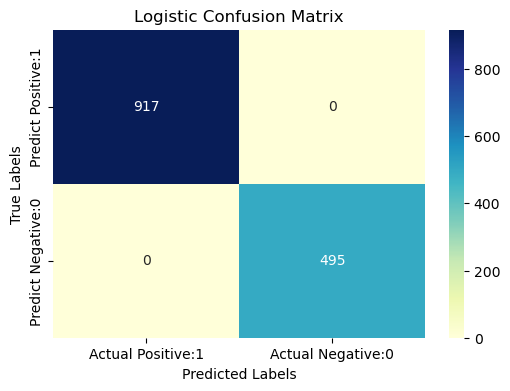

In [114]:
from sklearn.metrics import confusion_matrix

cm_logreg = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_logreg)

print('\nTrue Positives(TP) = ', cm_logreg[0, 0])
print('\nTrue Negatives(TN) = ', cm_logreg[1, 1])
print('\nFalse Positives(FP) = ', cm_logreg[0, 1])
print('\nFalse Negatives(FN) = ', cm_logreg[1, 0])

cm_matrix = pd.DataFrame(data=cm_logreg, 
                         columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Logistic Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


This means the model has classified every single instance correctly, achieving perfect performance on the test data.

Class Distribution
The confusion matrix shows a class imbalance where there are more "Positive" instances (917) compared to "Negative" instances (495). However, the model handles this imbalance perfectly, as there are no misclassifications.

The model has achieved a 100% accuracy on the test set.
While the model shows perfect performance on the test data, it’s important to assess whether this is due to overfitting on the training data. It's uncommon for a model to achieve perfect performance unless the dataset is relatively simple or lacks complexity.

### More models

#### KNN

0.9617563739376771
KNN Confusion Matrix

 [[894  23]
 [ 31 464]]

True Positives(TP) =  894

True Negatives(TN) =  464

False Positives(FP) =  23

False Negatives(FN) =  31


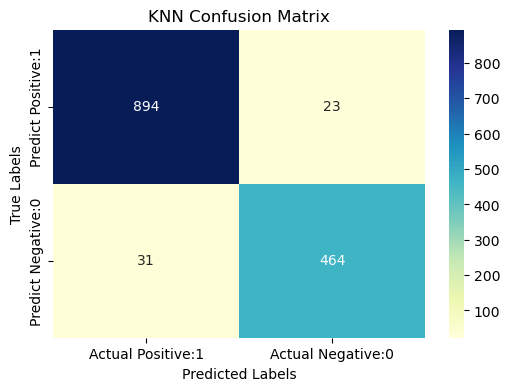

In [118]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print(accuracy)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print('KNN Confusion Matrix\n\n', cm_knn)

print('\nTrue Positives(TP) = ', cm_knn[0, 0])
print('\nTrue Negatives(TN) = ', cm_knn[1, 1])
print('\nFalse Positives(FP) = ', cm_knn[0, 1])
print('\nFalse Negatives(FN) = ', cm_knn[1, 0])

cm_matrix_knn = pd.DataFrame(data=cm_knn, 
                             columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_matrix_knn, annot=True, fmt='d', cmap='YlGnBu')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Random forest

1.0
Random Forest Confusion Matrix

 [[917   0]
 [  0 495]]

True Positives(TP) =  917

True Negatives(TN) =  495

False Positives(FP) =  0

False Negatives(FN) =  0


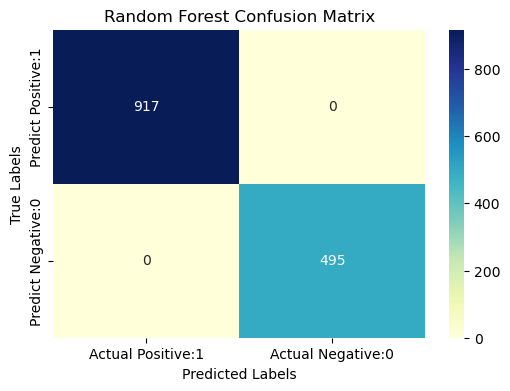

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model_rf = RandomForestClassifier(random_state=0)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
print(accuracy)
print('Random Forest Confusion Matrix\n\n', cm_rf)

print('\nTrue Positives(TP) = ', cm_rf[0, 0])
print('\nTrue Negatives(TN) = ', cm_rf[1, 1])
print('\nFalse Positives(FP) = ', cm_rf[0, 1])
print('\nFalse Negatives(FN) = ', cm_rf[1, 0])

cm_matrix_rf = pd.DataFrame(data=cm_rf, 
                            columns=['Actual Positive:1', 'Actual Negative:0'], 
                            index=['Predict Positive:1', 'Predict Negative:0'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_matrix_rf, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### SVM

0.9971671388101983
SVM Confusion Matrix

 [[916   1]
 [  3 492]]

True Positives(TP) =  916

True Negatives(TN) =  492

False Positives(FP) =  1

False Negatives(FN) =  3


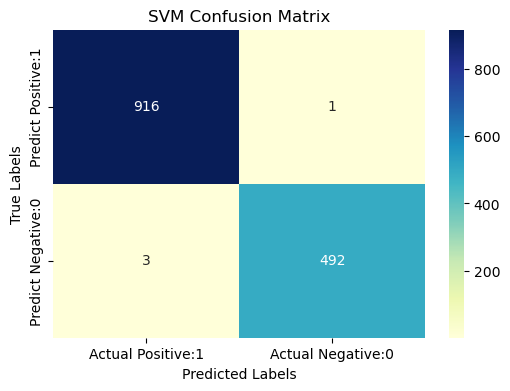

In [120]:
from sklearn.svm import SVC

model_svm = SVC()

model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
accuracy = accuracy_score(y_test, y_pred_svm)
print(accuracy)
print('SVM Confusion Matrix\n\n', cm_svm)

print('\nTrue Positives(TP) = ', cm_svm[0, 0])
print('\nTrue Negatives(TN) = ', cm_svm[1, 1])
print('\nFalse Positives(FP) = ', cm_svm[0, 1])
print('\nFalse Negatives(FN) = ', cm_svm[1, 0])

cm_matrix_svm = pd.DataFrame(data=cm_svm, 
                             columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_matrix_svm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Conclusion
Random Forest shows the best classification ability on the current dataset, with 100% accuracy and no misclassification.
SVM follows closely behind, performing very close to perfect, with only very few samples showing errors.
KNN has relatively poor classification ability, with more misclassifications (23 negatives and 31 positives), and is slightly inferior when dealing with imbalanced data.
All models perform well when dealing with class imbalance (917 positives and 495 negatives).
Random Forest and SVM handle imbalanced data very effectively, with almost no classification bias caused by class imbalance.